<a href="https://colab.research.google.com/github/Bryan-Az/LBP_Image_Analysis/blob/main/LBP_LogoAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from demo_from_class import lbp
import os
import cv2
import numpy as np
import pandas as pd
import altair as alt

# LBP Image Analysis
In this notebook, I will be creating histograms of the Local Binary Patterns (LBP) algorithm applied on a set of images as a visual description feature used in many A.I vision algorithms. A brief summary of the LBP algorithm is that it uses clusters of pixels (pixel neighborhoods) and applies a given threshold to compare each central pixel to the rest of the neighborhoods. The comparison then transforms each neighbor pixel to a value of 1 if the neighbor pixel is greater than the central pixel, or 0 if it is less than. Given each pixel ranges from 0-255 (and we are only using a single layer (since we are converting the pictures to grayscale)), the comparison generates a single transformed LBP image "pattern" that can describe the physical texture (contrast between lighting) details of the image if we convert it into a histogram. The histogram is the main feature we are interested in LBP analysis.   

In [ ]:
print(os.getcwd())

/Users/mocha/DataspellProjects/CMPE256_Assignments/LBP_Image_Analysis


## Loading the Images & Generating the LBP Histogram Features
Using the lbp.py script/functions in the demo_from_class directory

 > credit: Chandrasekar Vuppalapati, San Jose State Univ. CMPE 256

/Users/mocha/DataspellProjects/CMPE256_Assignments/LBP_Image_Analysis/demo_from_class/lbp.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_plot.set_yticklabels(ytick_list,rotation = 90)


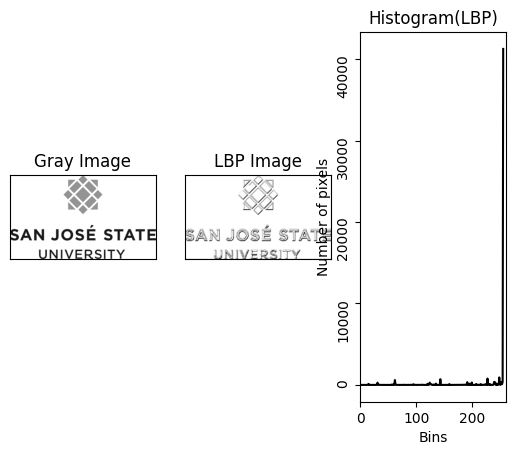

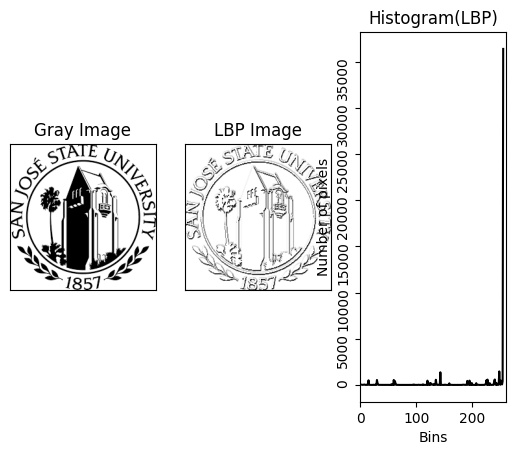

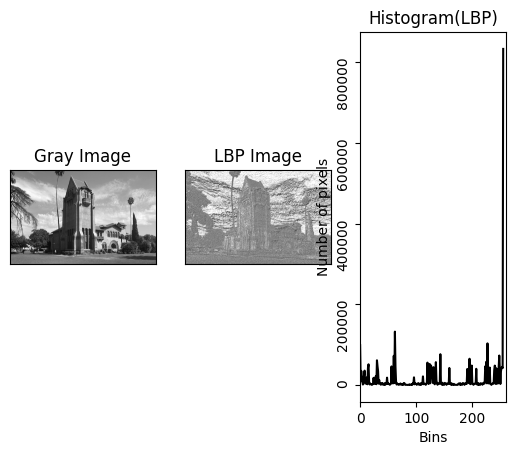

LBP Program is finished


In [ ]:
image_files = ['./images/SJSU_logo_Color.png', './images/SJSU_logo_GreyScale.png', './images/SJSU_Photograph.png']
output_lists = {'Color Logo': [], 'Gray Logo': [], 'Photograph': []}
for image_file in image_files:
    img_bgr = cv2.imread(image_file)
    height, width, channel = img_bgr.shape
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    img_lbp = np.zeros((height, width,3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
                img_lbp[i, j] = lbp.lbp_calculated_pixel(img_gray, i, j)
    hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
    output_list = []
    output_list.append({
        "img": img_gray,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "Gray Image",
        "type": "gray"
    })
    output_list.append({
        "img": img_lbp,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "LBP Image",
        "type": "gray"
    })
    output_list.append({
        "img": hist_lbp,
        "xlabel": "Bins",
        "ylabel": "Number of pixels",
        "xtick": None,
        "ytick": None,
        "title": "Histogram(LBP)",
        "type": "histogram"
    })
    if image_file.find('Color') > 0:
        output_lists['Color'] = output_list
    elif image_file.find('GreyScale') > 0:
        output_lists['GreyScale'] = output_list
    else:
        output_lists['Photograph'] = output_list

    lbp.show_output(output_list)

print("LBP Program is finished")

## Interactive Histogram Visualizations

In [ ]:
def cv2Hist_to_altairHist(lbp_output_list):
    imageList = lbp_output_list[1]['img']
    pixel_values = imageList.flatten()
    flt_pix_df = pd.DataFrame({'pixels': pixel_values})
    # Binning the data to reduce plotting many rows
    # Define the number of bins
    num_bins = 10
    # Using the pandas cut function to assign each pixel intensity to a bin
    flt_pix_df['Bin'] = pd.cut(flt_pix_df['pixels'], bins=num_bins)
    # Calculate the number of pixels in each bin
    binned_pixel_counts = flt_pix_df.groupby('Bin')['pixels'].agg('count').reset_index(name='Count')
    binned_pixel_counts.Bin = binned_pixel_counts.Bin.astype(str)
    altHist = alt.Chart(binned_pixel_counts).mark_bar().encode(
        x='Bin:O', # Quantitative data with automatic binning
        y='Count:Q' # Count of pixels for the y-axis
    ).properties(
        title='Histogram of LBP Pixel Intensities'
    ).interactive()
    return altHist

## SJSU Color Logo LBP Histogram

In [ ]:
colorlogo_altHist = cv2Hist_to_altairHist(output_lists['Color'])

In [ ]:
colorlogo_altHist

alt.Chart(...)

## SJSU GreyScale Logo LBP Histogram

In [ ]:
greylogo_altHist = cv2Hist_to_altairHist(output_lists['GreyScale'])

In [ ]:
greylogo_altHist

alt.Chart(...)

## SJSU Photograph LBP Histogram

In [ ]:
photo_altHist = cv2Hist_to_altairHist(output_lists['Photograph'])

In [ ]:
photo_altHist

alt.Chart(...)